## Latihan ARIMA-Transformer

In [1]:
import warnings
warnings.filterwarnings("ignore")
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, anderson
from scipy.special import boxcox
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
data_df = pd.read_excel('Energy Consumption.xlsx')
columns_name = ['Energy Consumption']
Data = pd.DataFrame(data_df, columns=columns_name)

In [3]:
Data.describe()

,Energy Consumption
count,600.000000
mean,259.902547
std,68.908855
min,131.361000
25%,194.183000
50%,276.306000
75%,310.407000
max,400.275000


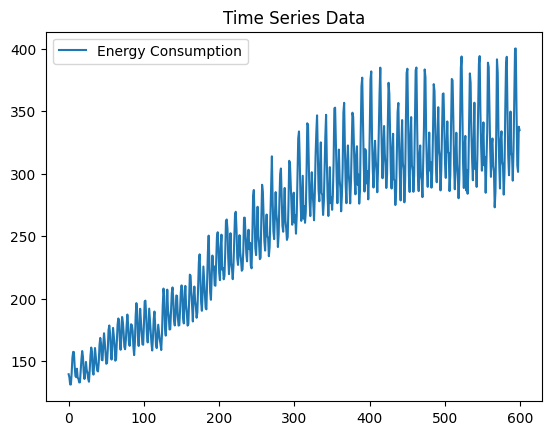

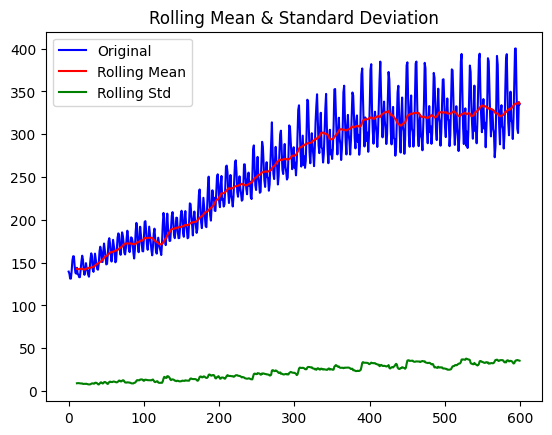

ADF Statistic: -1.9326754451148882
p-value: 0.31684907262282247
Critical Values:
	 1% : -3.4415777369651717
	 5% : -2.866493255736561
	 10% : -2.569407951640003


In [4]:
def check_stationarity(data):
    # Calculate rolling statistics
    rolling_mean = data.rolling(window=12).mean()
    rolling_std = data.rolling(window=12).std()

    # Plot rolling statistics
    plt.plot(data, color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='green', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    # Perform Augmented Dickey-Fuller test
    adf_result = adfuller(data)
    print('ADF Statistic:', adf_result[0])
    print('p-value:', adf_result[1])
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print('\t', key, ':', value)

# Plot the time series data
Data.plot()
plt.title('Time Series Data')
plt.show()

# Check stationarity and trends
check_stationarity(Data)

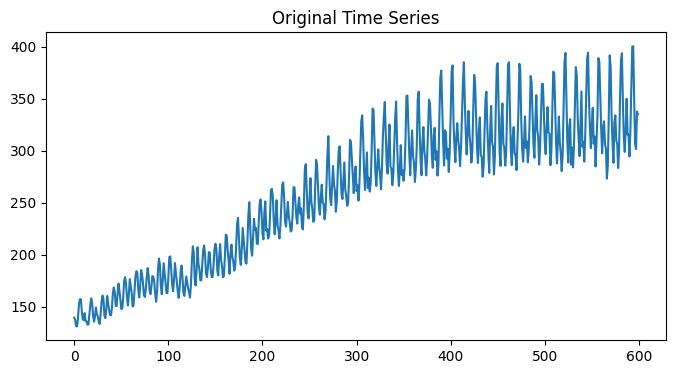

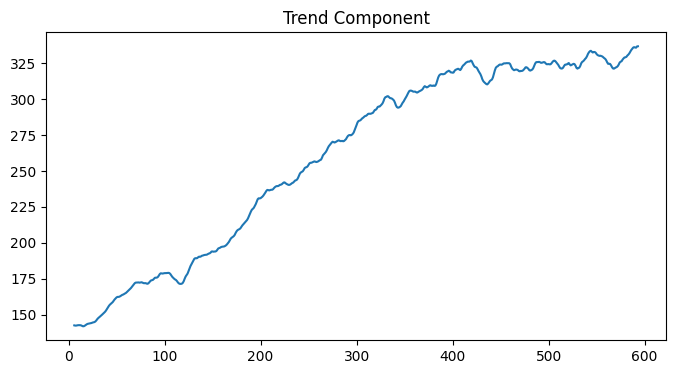

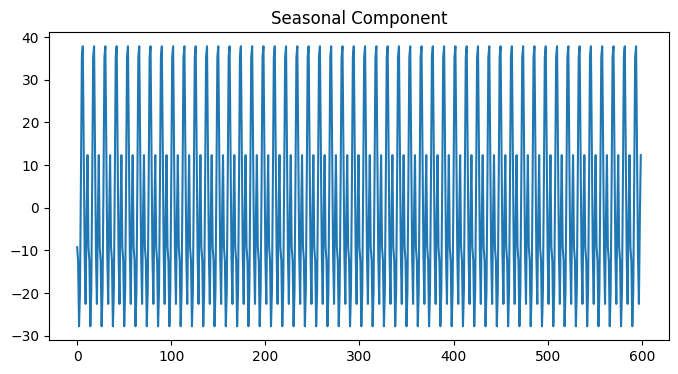

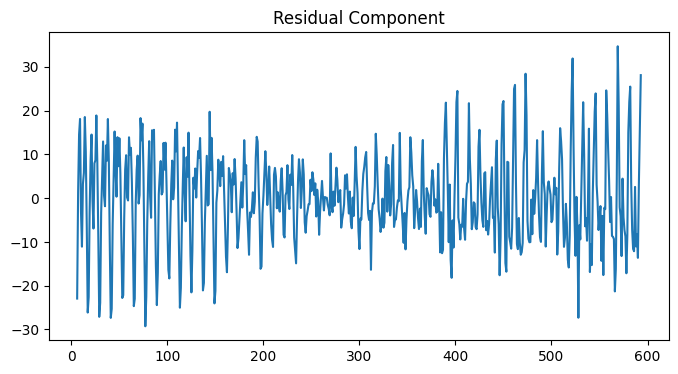

In [5]:
# Perform seasonal decomposition
result = seasonal_decompose(Data['Energy Consumption'], model='additive', period=12)  # Adjust the period according to your data

# Plot the original time series
plt.figure(figsize=(8, 4))
plt.plot(Data['Energy Consumption'])
plt.title('Original Time Series')
plt.show()

# Plot the trend component
plt.figure(figsize=(8, 4))
plt.plot(result.trend)
plt.title('Trend Component')
plt.show()

# Plot the seasonal component
plt.figure(figsize=(8, 4))
plt.plot(result.seasonal)
plt.title('Seasonal Component')
plt.show()

# Plot the residual component
plt.figure(figsize=(8, 4))
plt.plot(result.resid)
plt.title('Residual Component')
plt.show()

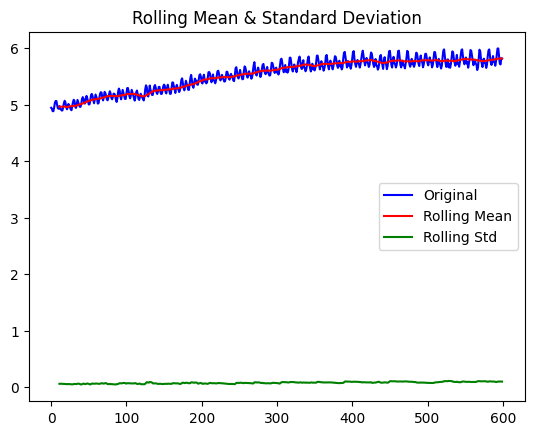

ADF Statistic: -2.8814920756945854
p-value: 0.04754293623948459
Critical Values:
	 1% : -3.4415777369651717
	 5% : -2.866493255736561
	 10% : -2.569407951640003


In [6]:
# Apply logarithmic transformation
log_transformed_data = np.log1p(Data['Energy Consumption'])

# Check stationarity for the log-transformed data
check_stationarity(log_transformed_data)

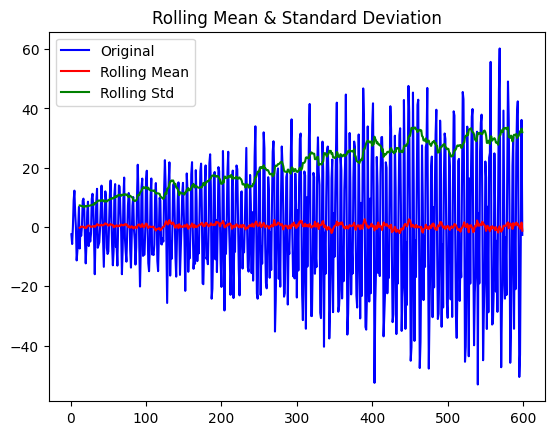

ADF Statistic: -8.060406747101686
p-value: 1.6488527168992277e-12
Critical Values:
	 1% : -3.4415777369651717
	 5% : -2.866493255736561
	 10% : -2.569407951640003


In [7]:
differenced_data = Data['Energy Consumption'].diff().dropna()

check_stationarity(differenced_data)

In [8]:
# Perform Shapiro-Wilk test for normality on the original data
stat_orig, p_orig = shapiro(Data['Energy Consumption'])
print('Shapiro-Wilk Test (Original Data)')
print('Test Statistic:', stat_orig)
print('p-value:', p_orig)


# Perform Shapiro-Wilk test for normality on the original data
stat_orig, p_orig = shapiro(differenced_data)
print('Shapiro-Wilk Test (Original Data)')
print('Test Statistic:', stat_orig)
print('p-value:', p_orig)

Shapiro-Wilk Test (Original Data)
Test Statistic: 0.95826877637922
p-value: 5.1953440643917975e-12
Shapiro-Wilk Test (Original Data)
Test Statistic: 0.9952989302904625
p-value: 0.06605863595138083


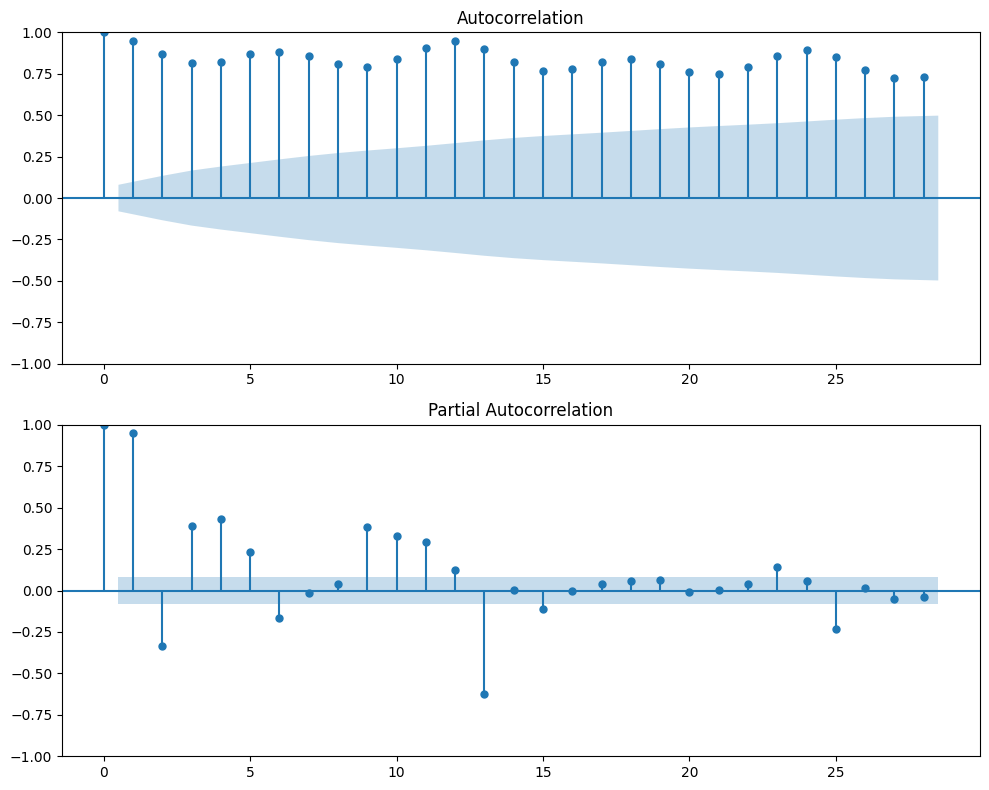

In [9]:
# Visualize the ACF and PACF plots
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(Data['Energy Consumption'], ax=axes[0])
plot_pacf(Data['Energy Consumption'], ax=axes[1])
plt.tight_layout()
plt.show()

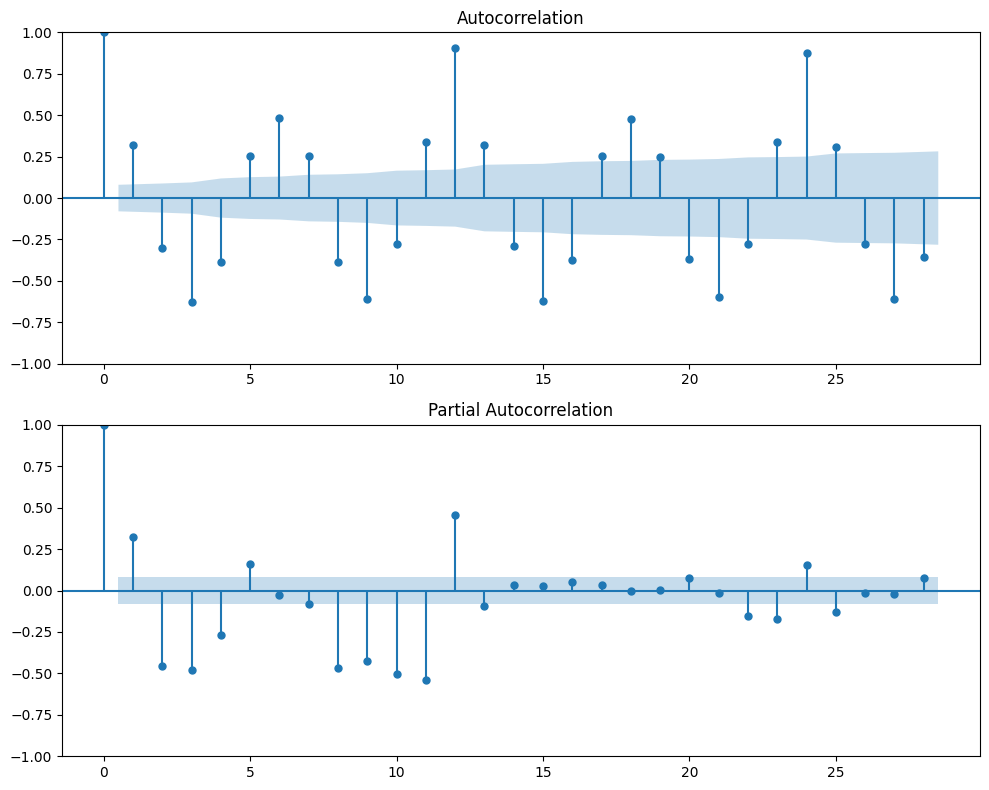

In [10]:
# Visualize the ACF and PACF plots
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(differenced_data, ax=axes[0])
plot_pacf(differenced_data, ax=axes[1])
plt.tight_layout()
plt.show()

In [11]:
# Define the range of p, d, q values
p_values = [13, 25]
d_values = [0, 1]
q_values = [12, 24]

# Create a list of all possible combinations of p, d, q
param_combinations = list(itertools.product(p_values, d_values, q_values))

best_model = None
best_mse = float('inf')  # Initialize with a large value

# Loop through all combinations
for params in param_combinations:
    p, d, q = params

    # Fit the ARIMA model
    model_ARIMA = ARIMA(Data['Energy Consumption'], order=(p, d, q))
    model_ARIMA_fit = model_ARIMA.fit()

    # Make predictions
    predictions = model_ARIMA_fit.predict(start=1, end=len(Data['Energy Consumption']))

    # Evaluate the model using Mean Squared Error (MSE)
    mse = mean_squared_error(Data['Energy Consumption'], predictions)

    # Update the best model if the current one is better
    if mse < best_mse:
        best_mse = mse
        best_model = model_ARIMA_fit
        best_params = params

# Print the best model and its parameters
print("Best Model Parameters (p, d, q):", best_params)
print("Best Model MSE:", best_mse)
print(best_model.summary())

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\HP\AppData\Local\Packages\PythonSoftw

Best Model Parameters (p, d, q): (13, 0, 12)
Best Model MSE: 377.8670450601651
                               SARIMAX Results                                
Dep. Variable:     Energy Consumption   No. Observations:                  600
Model:               ARIMA(13, 0, 12)   Log Likelihood               -1994.132
Date:                Thu, 27 Feb 2025   AIC                           4042.263
Time:                        15:12:26   BIC                           4160.981
Sample:                             0   HQIC                          4088.478
                                - 600                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        259.9024    250.467      1.038      0.299    -231.004     750.808
ar.L1         -0.3889      1.033     -0.376      0.7

In [12]:
# Determine the percentage of data to be used for training
train_percentage = 0.8

# Split the time series into training and validation sets
train_size = int(len(Data['Energy Consumption']) * train_percentage)
train_data = Data['Energy Consumption'][:train_size]
val_data = Data['Energy Consumption'][train_size:]

In [13]:
# Define the ARIMA order (p, d, q)
p = 13  # replace with your identified value
d = 0   # replace with your identified value
q = 12  # replace with your identified value

# Fit ARIMA model on training data

model_ARIMA = ARIMA(train_data, order=(p, d, q))
model_ARIMA_fit = model_ARIMA.fit()

# Predictions for training data
predictions_train = model_ARIMA_fit.predict(start=1, end=len(train_data))

# Predictions for entire data
predictions_entire = model_ARIMA_fit.predict(start=1, end=len(Data['Energy Consumption']))

# Make predictions on validation data
predictions_val = model_ARIMA_fit.predict(start=len(train_data), end=len(Data['Energy Consumption'])-1, typ='levels')

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [14]:
# Display the summary
print(model_ARIMA_fit.summary())

                               SARIMAX Results                                
Dep. Variable:     Energy Consumption   No. Observations:                  480
Model:               ARIMA(13, 0, 12)   Log Likelihood               -1528.857
Date:                Thu, 27 Feb 2025   AIC                           3111.713
Time:                        15:12:51   BIC                           3224.405
Sample:                             0   HQIC                          3156.010
                                - 480                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        243.1124   1775.839      0.137      0.891   -3237.468    3723.693
ar.L1          0.6031      0.237      2.549      0.011       0.139       1.067
ar.L2          0.0101      0.024      0.425      0.6

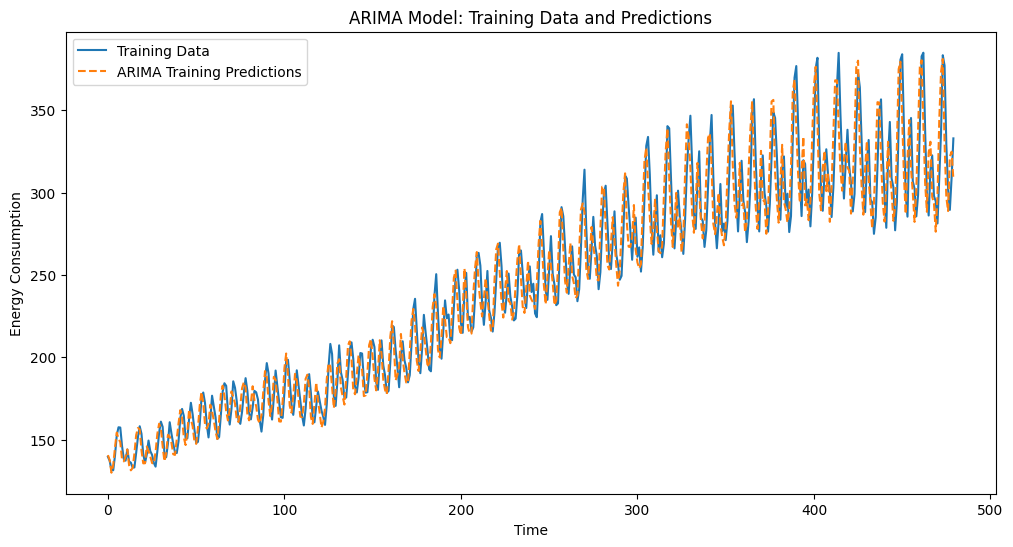

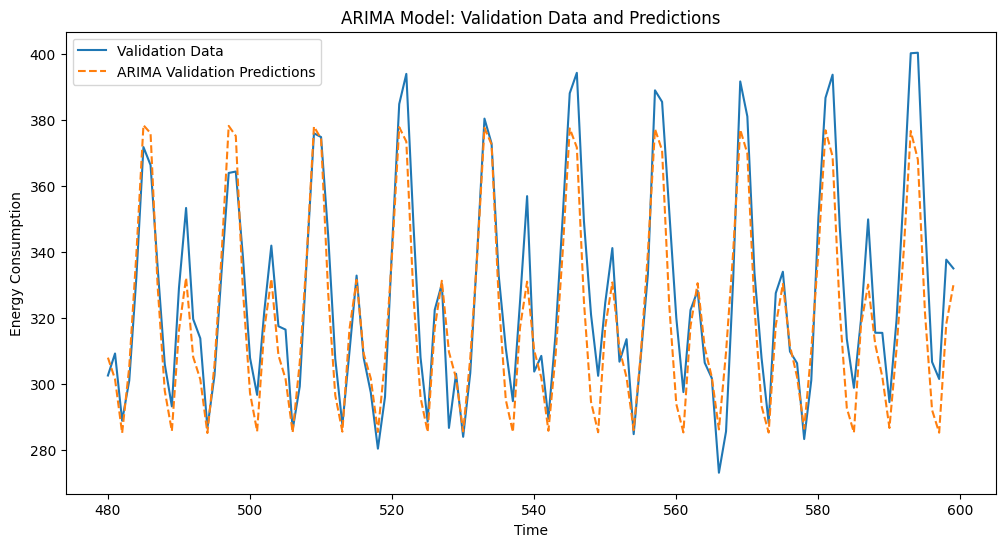

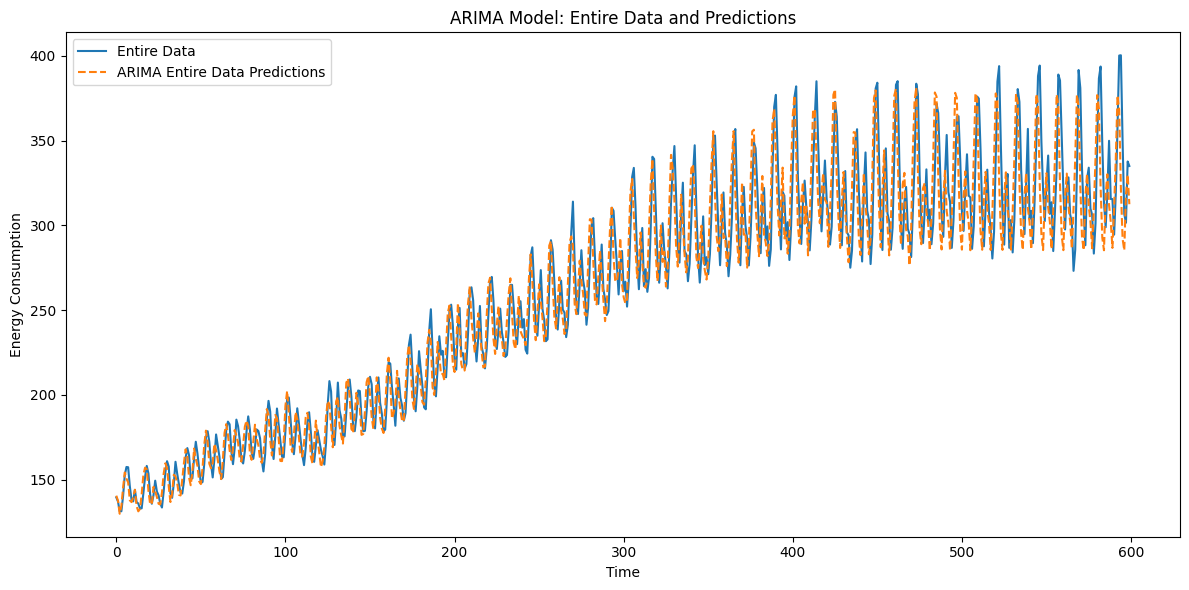

In [15]:
# Plotting train data and train predictions
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(train_data.index, predictions_train, label='ARIMA Training Predictions', linestyle='--')
plt.title('ARIMA Model: Training Data and Predictions')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.legend()

# Plotting test data and test predictions
plt.figure(figsize=(12, 6))
plt.plot(val_data.index, val_data, label='Validation Data')
plt.plot(val_data.index, predictions_val, label='ARIMA Validation Predictions', linestyle='--')
plt.title('ARIMA Model: Validation Data and Predictions')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.legend()

# Plotting entire data and entire predictions
plt.figure(figsize=(12, 6))
plt.plot(Data['Energy Consumption'], label='Entire Data')
plt.plot(Data['Energy Consumption'].index, predictions_entire, label='ARIMA Entire Data Predictions', linestyle='--')
plt.title('ARIMA Model: Entire Data and Predictions')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
def calculate_metrics_and_print(original_data, predictions, model_order):
    # Mean Squared Error (MSE)
    mse = mean_squared_error(original_data, predictions)

    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)

    # R-squared (R2)
    r2 = r2_score(original_data, predictions)

    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(original_data, predictions)

    # Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) using the relative formula
    n = len(original_data)
    k = len(model_order)  # Number of parameters in the model
    aic = n * np.log(mse) + 2 * k
    bic = n * np.log(mse) + k * np.log(n)

    # Log Likelihood
    log_likelihood = -0.5 * n * np.log(2 * np.pi) - 0.5 * n * np.log(mse)

    # Mean Absolute Percentage Error (MAPE)
    ape = np.abs((original_data - predictions) / original_data)
    mape = np.mean(ape) * 100

    # Print the metrics
    print("Metrics for Original Data Model:")
    print("MSE: ", mse)
    print("RMSE: ", rmse)
    print("R-squared: ", r2)
    print("MAE: ", mae)
    print("AIC: ", aic)
    print("BIC: ", bic)
    print("Log Likelihood: ", log_likelihood)
    print("MAPE: ", mape)

In [17]:
# Example usage
model_order = (p, d, q)  # Replace with the actual values of p, d, q
calculate_metrics_and_print(Data['Energy Consumption'], predictions_entire, model_order)

Metrics for Original Data Model:
MSE:  444.1520590315344
RMSE:  21.07491539796861
R-squared:  0.9063072396537182
MAE:  16.788284483534383
AIC:  3663.7001874583175
BIC:  3676.890976423966
Log Likelihood:  -2380.213213651962
MAPE:  1.9679478082101294


In [18]:
# Example usage
model_order = (p, d, q)  # Replace with the actual values of p, d, q
calculate_metrics_and_print(train_data, predictions_train, model_order)

Metrics for Original Data Model:
MSE:  294.9215305702705
RMSE:  17.173279551974645
R-squared:  0.9308681041308668
MAE:  14.03672892012892
AIC:  2735.620474986806
BIC:  2748.1418332985118
Log Likelihood:  -1805.900733431646
MAPE:  1.7044848583819106


In [19]:
# Example usage
model_order = (p, d, q)  # Replace with the actual values of p, d, q
calculate_metrics_and_print(val_data, predictions_val, model_order)

Metrics for Original Data Model:
MSE:  157.91457051888958
RMSE:  12.566406428207292
R-squared:  0.8421593148460351
MAE:  10.03169352821357
AIC:  613.4465032657702
BIC:  621.8089784941163
Log Likelihood:  -413.9958756174458
MAPE:  3.019604082941103


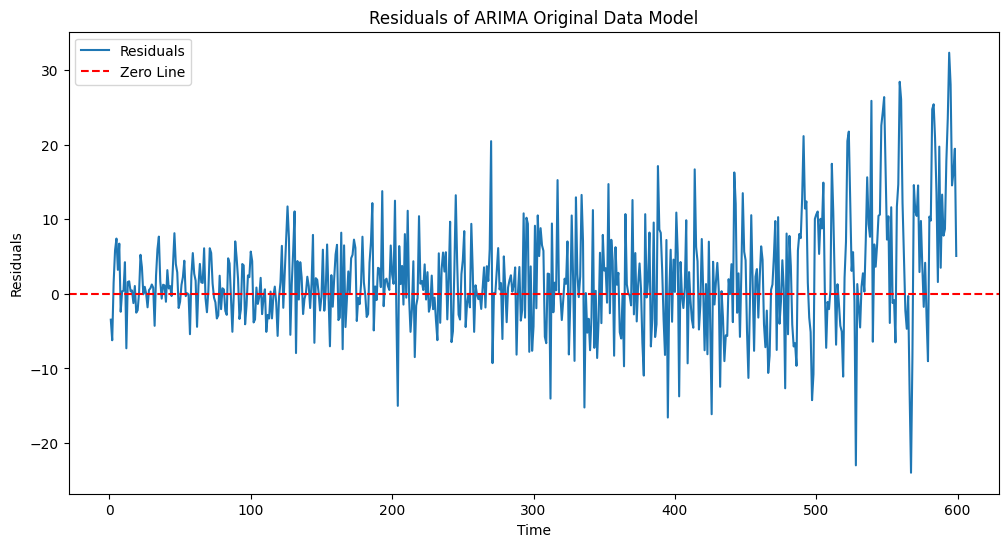

In [ ]:
# Calculate residuals
residuals = Data['Energy Consumption'] - predictions_entire

# Drop NaN values from residuals
residuals = residuals.dropna()

# residuals = val_data - predictions_val

# residuals = residuals.dropna()

# Plot residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Line')
plt.title('Residuals of ARIMA Original Data Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()

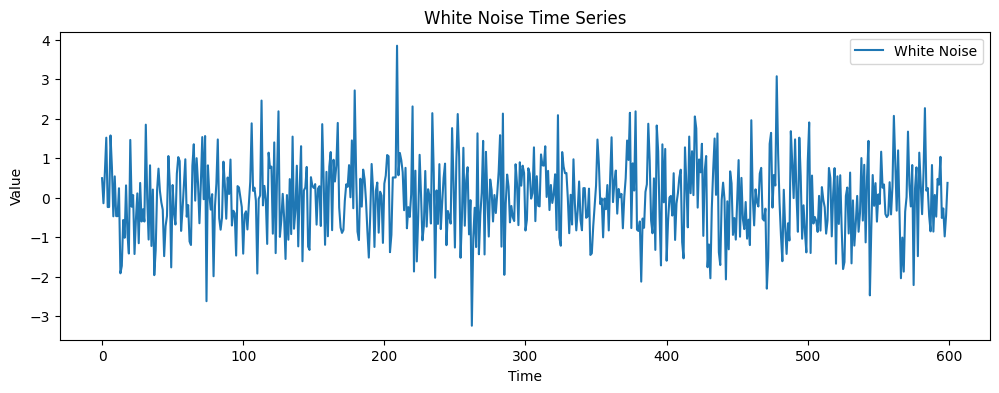

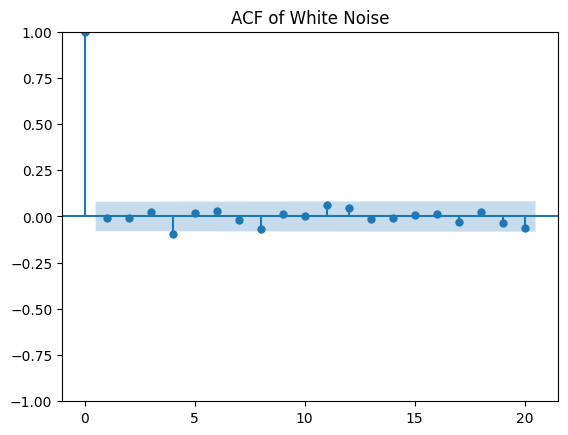

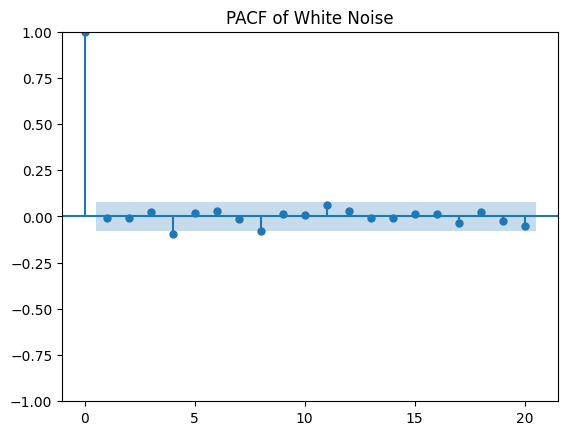

In [21]:
# Set a seed for reproducibility
np.random.seed(42)

# Generate white noise with 100 data points
white_noise = np.random.normal(size=600)

# Plot the white noise time series
plt.figure(figsize=(12, 4))
plt.plot(white_noise, label='White Noise')
plt.title('White Noise Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Plot ACF and PACF for white noise
acf_white_noise = plot_acf(white_noise, lags=20, title='ACF of White Noise')
pacf_white_noise = plot_pacf(white_noise, lags=20, title='PACF of White Noise')

Shapiro-Wilk Test (Normality):
Test Statistic: 0.9615989368369532
P-value: 2.121941792106655e-11
The residuals may not be normally distributed.
Anderson-Darling Test (Normality):
Test Statistic: 6.144464684551963
The data is likely not normal at the 15.0% significance level.
The data is likely not normal at the 10.0% significance level.
The data is likely not normal at the 5.0% significance level.
The data is likely not normal at the 2.5% significance level.
The data is likely not normal at the 1.0% significance level.


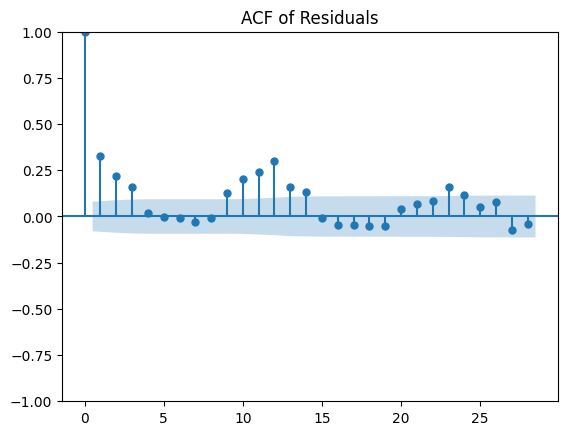

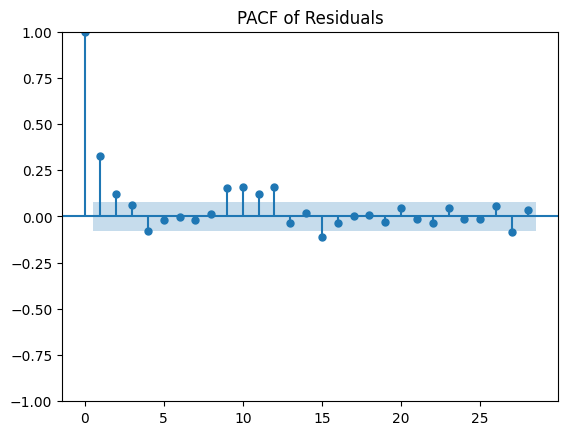

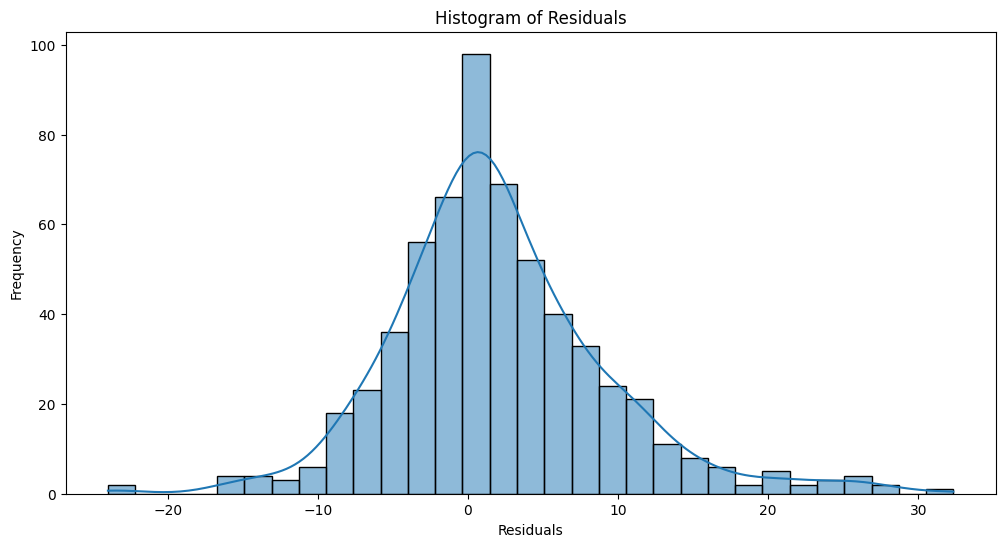

In [22]:
# Check for normality using the Shapiro-Wilk test
stat, p_value = shapiro(residuals)
print("Shapiro-Wilk Test (Normality):")
print("Test Statistic:", stat)
print("P-value:", p_value)
if p_value > 0.05:
    print("The residuals appear to be normally distributed.")
else:
    print("The residuals may not be normally distributed.")

# Perform the Anderson-Darling test for normality
result = anderson(residuals)

# Extract the test statistic and critical values
test_statistic = result.statistic
critical_values = result.critical_values

# Compare the test statistic with critical values
print("Anderson-Darling Test (Normality):")
print("Test Statistic:", test_statistic)

# Interpret the results based on critical values
for i, cv in enumerate(critical_values):
    if test_statistic < cv:
        print(f"The data may be normal at the {result.significance_level[i]}% significance level.")
    else:
        print(f"The data is likely not normal at the {result.significance_level[i]}% significance level.")


# Plot ACF and PACF on residuals
acf_res = plot_acf(residuals,  title='ACF of Residuals')
pacf_res = plot_pacf(residuals,  title='PACF of Residuals')

# Plot histogram of residuals
plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()